In [11]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
ds = pd.read_csv("admission.csv")
print("Missing Values:\n", ds.isnull().sum())
print("Duplicate Rows:", ds.duplicated().sum())
ds["Profession"].fillna("Unknown", inplace=True)
ds.drop_duplicates(inplace=True)
print("\nAfter Cleaning:")
print("Missing Values:\n", ds.isnull().sum())
print("Duplicate Rows:", ds.duplicated().sum())


Missing Values:
 Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64
Duplicate Rows: 0


KeyError: 'Profession'

(array([ 6., 25., 43., 64.,  0., 80., 88., 89., 63., 42.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

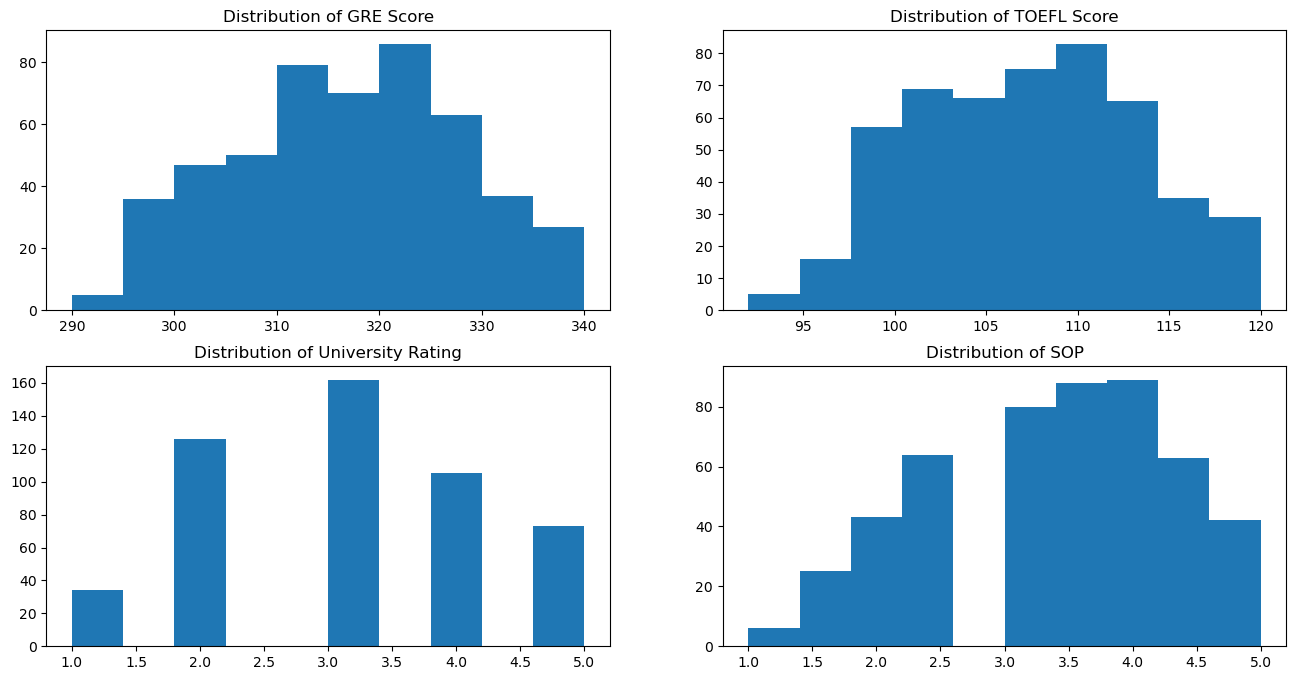

In [13]:
fig, axes = plt.subplots(2, 2, figsize=(16,8))
axes[0,0].set_title("Distribution of GRE Score")
axes[0,0].hist(ds["GRE Score"])

axes[0,1].set_title("Distribution of TOEFL Score")
axes[0,1].hist(ds["TOEFL Score"])

axes[1,0].set_title("Distribution of University Rating")
axes[1,0].hist(ds["University Rating"])

axes[1,1].set_title("Distribution of SOP")
axes[1,1].hist(ds["SOP"])

In [15]:
ds.isnull()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
495,False,False,False,False,False,False,False,False,False
496,False,False,False,False,False,False,False,False,False
497,False,False,False,False,False,False,False,False,False
498,False,False,False,False,False,False,False,False,False


In [17]:
ds.fillna(ds.mean(), inplace = True)
ds.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [21]:
X = ds[["GRE Score", "TOEFL Score", "University Rating", "SOP", "CGPA"]]
y = ds["Research"]

In [23]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [29]:
regressor = LinearRegression()

In [31]:
regressor.fit(X_train, y_train)

LinearRegression()

In [33]:
y_pred = regressor.predict(X_test)

In [35]:
print("Mean absolute error: ", metrics.mean_absolute_error(y_test, y_pred))
print("Mean squared error: ", metrics.mean_squared_error(y_test, y_pred))
print("R2 score: ", metrics.r2_score(y_test, y_pred))

Mean absolute error:  0.3548724169479487
Mean squared error:  0.18125815357347194
R2 score:  0.2578200603811587
